In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [3]:
!pip install imblearn # install the imblearn library
from imblearn.over_sampling import RandomOverSampler

# White Wine Neural Network Model

In [7]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
white_wine['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [10]:
# Define a function to categorize the quality
def categorize_quality(quality):
    if 1 <= quality <= 3:
        return '0'
    elif 4 <= quality <= 6:
        return '1'
    elif 7 <= quality <= 9:
        return '2'

# Apply the function to create the 'quality_category' column
white_wine['quality_category'] = white_wine['quality'].apply(categorize_quality)

# Display the first few rows of the DataFrame to verify the changes
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [11]:
white_wine = white_wine.drop('quality', axis=1)

In [12]:
white_wine['quality_category'].value_counts()

,count
quality_category,
1,3818
2,1060
0,20


In [13]:
# Remove quality target from features data
y = white_wine.quality_category.values
X = white_wine.drop(columns="quality_category").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

1    3818
2    3818
0    3818
Name: count, dtype: int64


In [16]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Print the shape of the scaled data to check for inconsistencies
print(X_train_scaled.shape) # Add this line to check the shape

(3673, 11)


In [17]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax")) # Changed output layer units to 3 to match the number of unique values in the target variable

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Use categorical_crossentropy

# Convert y_train to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7278 - loss: 0.7446
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.5244
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7842 - loss: 0.4941
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4738
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4518
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.4520
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8201 - loss: 0.4198
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4173
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8155 - loss: 0.4144
Epoch 10/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.3977
Epoch 11/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8207 - loss: 0.4009
Epoch 12/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,  tf.keras.utils.to_categorical(y_test), verbose=2) # One-hot encode y_test
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 0s - 9ms/step - accuracy: 0.8278 - loss: 0.3931
Loss: 0.3930951952934265, Accuracy: 0.8277550935745239


# Red Wine Neural Network Model

In [19]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
red_wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [22]:
# Apply the function to create the 'quality_category' column
red_wine['quality_category'] = red_wine['quality'].apply(categorize_quality)

# Display the first few rows of the DataFrame to verify the changes
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [23]:
red_wine = red_wine.drop('quality', axis=1)

In [24]:
# Remove quality target from features data
y = red_wine.quality_category.values
X = red_wine.drop(columns="quality_category").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [25]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

1    1372
2    1372
0    1372
Name: count, dtype: int64


In [26]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Print the shape of the scaled data to check for inconsistencies
print(X_train_scaled.shape) # Add this line to check the shape

(1199, 11)


In [27]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax")) # Changed output layer units to 3 to match the number of unique values in the target variable

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Use categorical_crossentropy

# Convert y_train to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6224 - loss: 0.8689
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.5691
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.4651
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.4062
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8538 - loss: 0.4046 
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3497 
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.3135
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3249
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8773 - loss: 0.3164
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8843 - loss: 0.3411
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8916 - loss: 0.2930 
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 -

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,  tf.keras.utils.to_categorical(y_test), verbose=2) # One-hot encode y_test
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 19ms/step - accuracy: 0.8775 - loss: 0.3636
Loss: 0.3636336624622345, Accuracy: 0.8774999976158142


# Combined Wine Data Neural Network Model

In [29]:
combined_df = pd.concat([white_wine, red_wine], ignore_index=True)
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality_category      6497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


In [31]:
# Remove quality target from features data
y = combined_df.quality_category.values
X = combined_df.drop(columns="quality_category").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [32]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

1    5190
2    5190
0    5190
Name: count, dtype: int64


In [33]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Print the shape of the scaled data to check for inconsistencies
print(X_train_scaled.shape) # Add this line to check the shape

(4872, 11)


In [34]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=3, activation="softmax")) # Changed output layer units to 3 to match the number of unique values in the target variable

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Use categorical_crossentropy

# Convert y_train to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6737 - loss: 0.8551
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8059 - loss: 0.4681
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8231 - loss: 0.4233
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4315
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.4068
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4058
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.4146
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.3955
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8298 - loss: 0.3920
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.3993
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8218 - loss: 0.4028
Epoch 12/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,  tf.keras.utils.to_categorical(y_test), verbose=2) # One-hot encode y_test
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - 4ms/step - accuracy: 0.8246 - loss: 0.3984
Loss: 0.3984414339065552, Accuracy: 0.8246153593063354


# Combined Data Random Forest Model

In [36]:
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [37]:
# re-creating combined dataframe to include 'quality' column
whiteDF = pd.read_csv('winequality-white.csv', sep=';')
redDF = pd.read_csv('winequality-red.csv', sep=';')

redWhiteDF = pd.concat([whiteDF, redDF], ignore_index=True)
redWhiteDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
# Define features set
X = redWhiteDF.copy()
X.drop("quality", axis=1, inplace=True)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [39]:
# Define target vector
y = redWhiteDF["quality"].ravel()
y[:5]

array([6, 6, 6, 6, 6])

In [40]:
redWhiteDF['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [41]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64


In [42]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [43]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [44]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [45]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [47]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [48]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [49]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define the labels for your 3 classes
labels = ["3", "4", "5", "6", "7", "8", "9"]

cm_df = pd.DataFrame(
    cm, index=[f"Actual {label}" for label in labels], columns=[f"Predicted {label}" for label in labels]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [50]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,1,4,4,0,0,0
Actual 4,0,8,35,21,0,0,0
Actual 5,0,1,398,148,3,0,0
Actual 6,0,1,111,525,43,0,0
Actual 7,0,0,10,122,151,2,0
Actual 8,0,0,0,12,11,11,0
Actual 9,0,0,0,2,1,0,0


Accuracy Score : 0.6726153846153846
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.73      0.12      0.21        64
           5       0.71      0.72      0.72       550
           6       0.63      0.77      0.69       680
           7       0.72      0.53      0.61       285
           8       0.85      0.32      0.47        34
           9       0.00      0.00      0.00         3

    accuracy                           0.67      1625
   macro avg       0.52      0.35      0.39      1625
weighted avg       0.68      0.67      0.66      1625



# Feature Importance Graph

In [51]:
importances = rf_model.feature_importances_
importances

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1228541834756794, 'alcohol'),
 (0.10213457013517334, 'volatile acidity'),
 (0.10185320716189483, 'density'),
 (0.09113809109468214, 'total sulfur dioxide'),
 (0.08677057522512018, 'sulphates'),
 (0.08668949352072257, 'chlorides'),
 (0.08611019795650059, 'free sulfur dioxide'),
 (0.08401862460115347, 'residual sugar'),
 (0.08355183861811914, 'pH'),
 (0.0803368568620962, 'citric acid'),
 (0.07454236134885828, 'fixed acidity')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

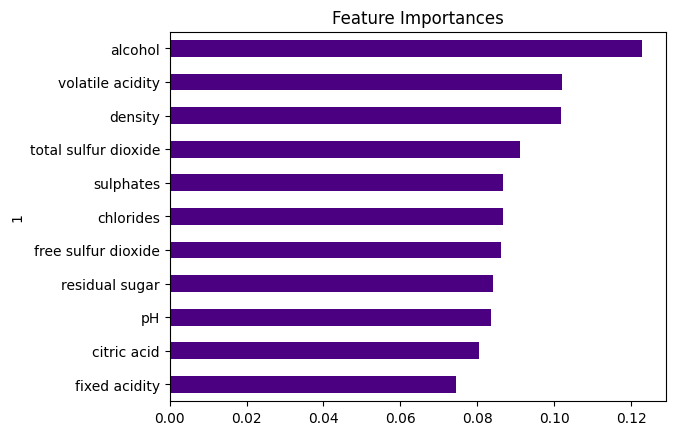

In [52]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importance'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importance', ascending=True)
importances_sorted.plot(kind='barh', color='indigo', title = 'Feature Importances', legend=False)

# Correlation Matrix

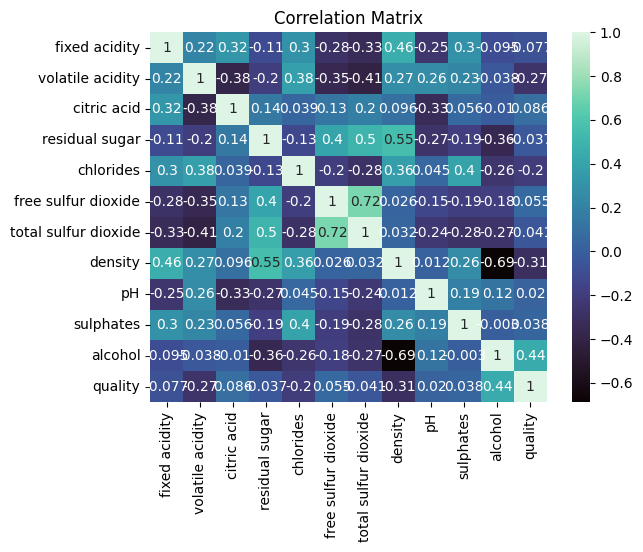

In [53]:
# Import dependacies for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = redWhiteDF.corr()
sns.heatmap(corr, cmap='mako', annot=True)
plt.title('Correlation Matrix')
plt.show()

# Histogram

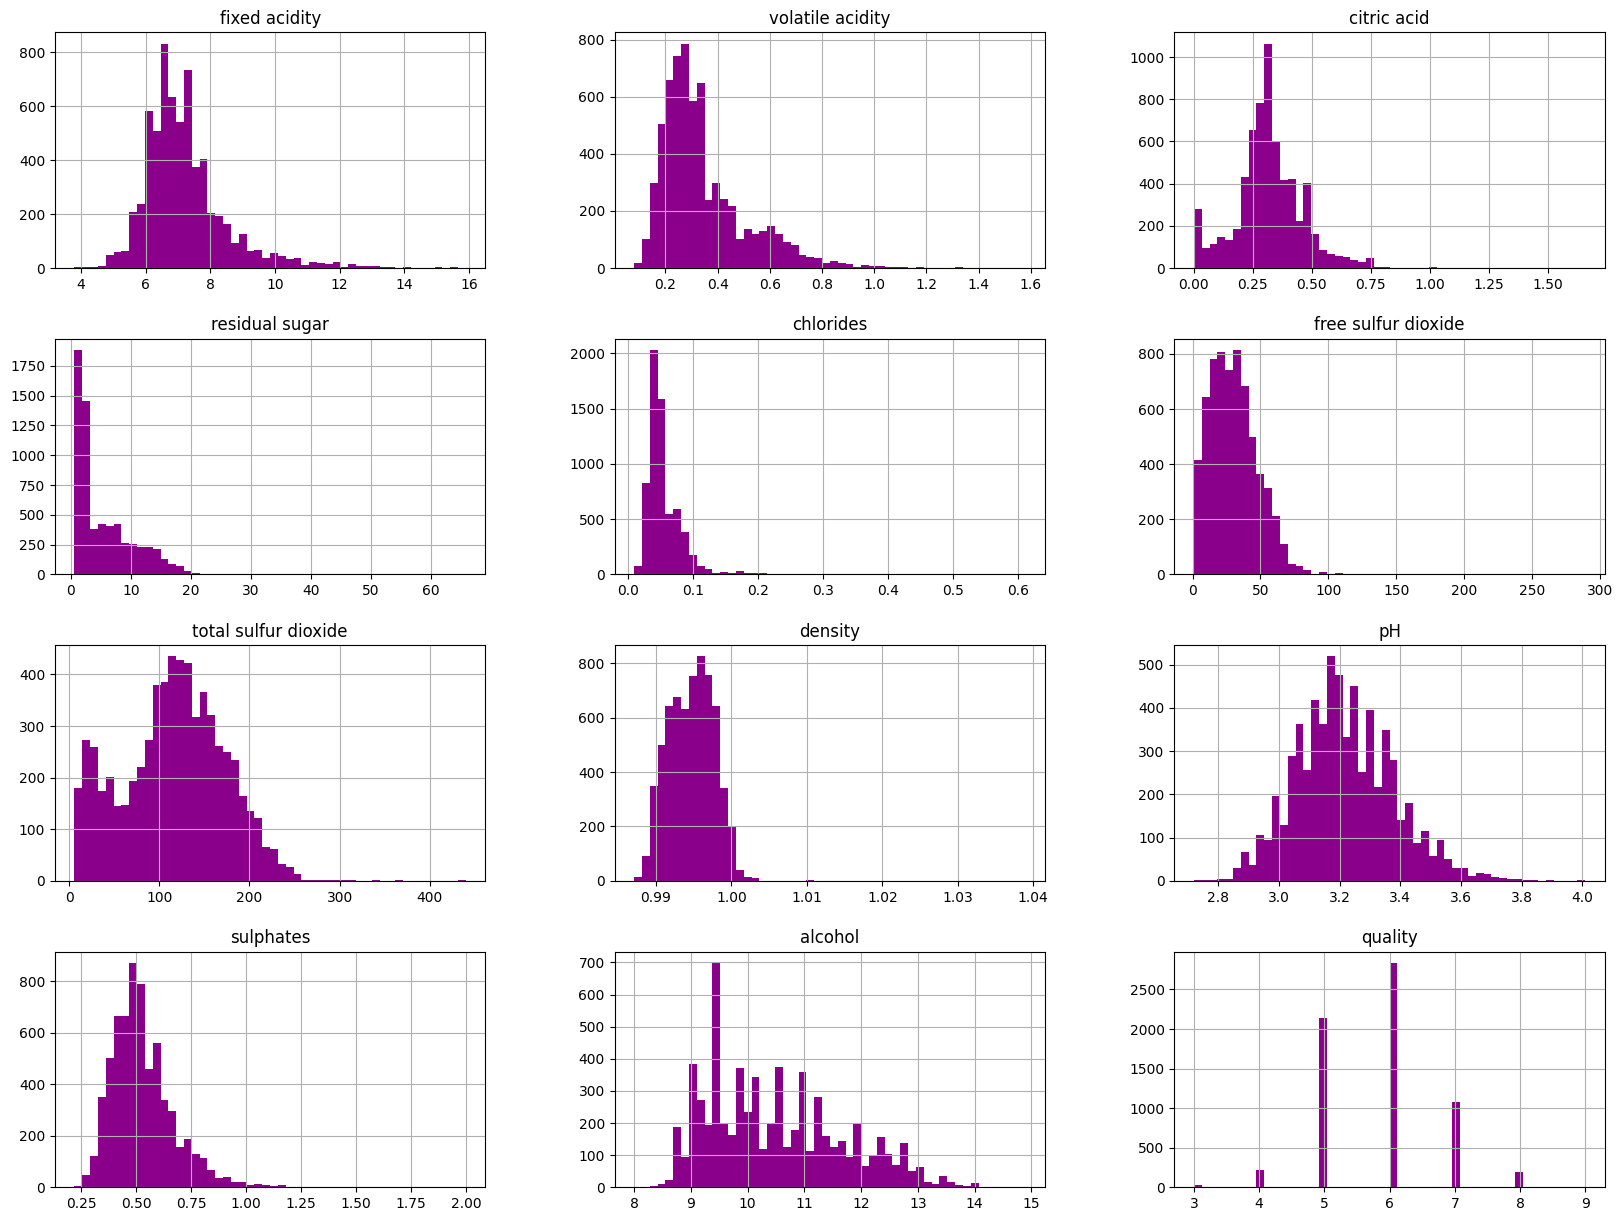

In [54]:
redWhiteDF.hist(bins=50, color='darkmagenta', figsize=(20,15))
plt.show()

# Alcohol Distribution Plot

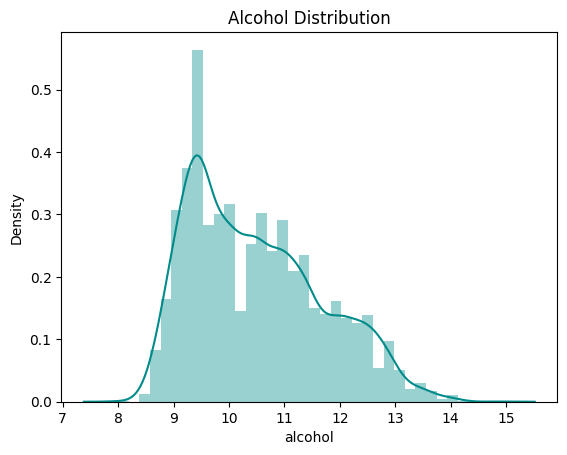

In [55]:
# Distribution plot of "alcohol" since it is the most important in the feature importance plot
sns.distplot(redWhiteDF['alcohol'], color='darkcyan')
plt.title('Alcohol Distribution')
plt.show()

# Alcohol Box Plot

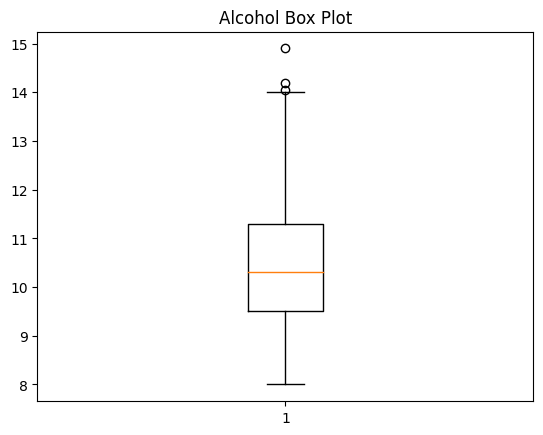

In [56]:
# Create alcohol box plot
plt.boxplot(redWhiteDF['alcohol'])
plt.title('Alcohol Box Plot')
plt.show()

# Quality Box Plot

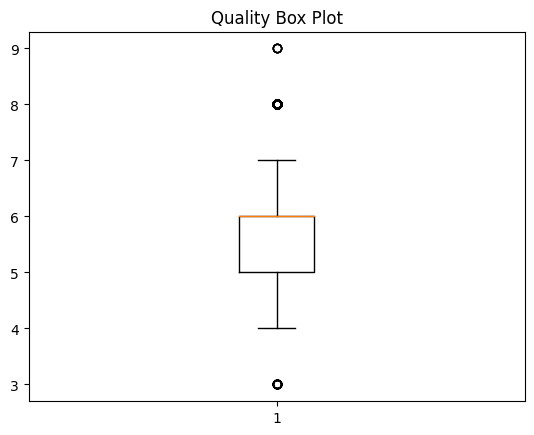

In [57]:
plt.boxplot(redWhiteDF['quality'])
plt.title('Quality Box Plot')
plt.show()

# Model Accuracy Comparison

In [58]:
# Create results dataframe
resultsNN = pd.DataFrame({
    'Model': ['White Wine NN', 'Red Wine NN', 'Combined NN w/ Quality Category', 'Combined NN w/o Quality Category'],
    'Accuracy': [0.820,0.868,0.827,0.556],
    'Loss': [0.399,0.308,0.391,1.037]
})

resultsNN

,Model,Accuracy,Loss
0,White Wine NN,0.820,0.399
1,Red Wine NN,0.868,0.308
2,Combined NN w/ Quality Category,0.827,0.391
3,Combined NN w/o Quality Category,0.556,1.037


In [59]:
resultsRF = pd.DataFrame({
    'Model': ['Combined RF w/o Random Sampler', 'Combined RF w/ Random Sampler'],
    'Accuracy': [0.689, 0.673]
})

resultsRF

,Model,Accuracy
0,Combined RF w/o Random Sampler,0.689
1,Combined RF w/ Random Sampler,0.673


# Loading Combined DataFrame into MongoDB
<p>To be able to run the code below, you must use a Jupyter Notebook.

In [66]:
# import pymongo
!pip install pymongo
import pymongo
from pymongo import MongoClient

In [69]:
# create mongo connection
mongo = MongoClient(host='localhost', port=27017)

# connect to MongoDB database "WineQuality"
db = mongo.WineQuality

# connect to "red_white_wine" collection
red_white_wine = db.red_white_wine

In [ ]:
# insert combined data into "red_white_wine" collection
red_white_wine.insert_many(redWhiteDF.to_dict('records'))